# Objective:-Build a prediction model for Salary_hike


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data=pd.read_csv("Salary_Data.csv")

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.info() ##Not missing  value present in the data & data types is appropriate in the all attributes  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:>

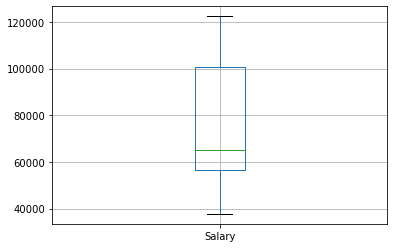

In [7]:
data[['Salary']].boxplot() ## Outlier not present in the salary dataset

<AxesSubplot:>

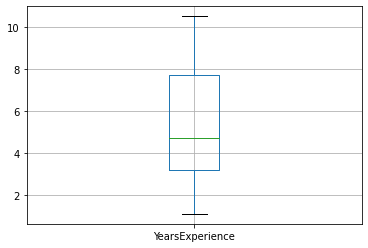

In [8]:
data[['YearsExperience']].boxplot() ## Outlier not present in the  YE dataset

In [9]:
##Rename the column
data.rename(columns={'YearsExperience':'yexp','Salary':'sal'},inplace=True)

In [10]:
data.head(2)

,yexp,sal
0,1.1,39343.0
1,1.3,46205.0


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yexp', ylabel='Density'>

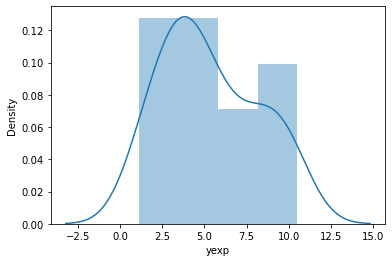

In [11]:
sns.distplot(data.yexp)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sal', ylabel='Density'>

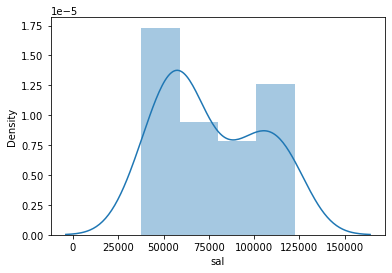

In [12]:
sns.distplot(data.sal)

<AxesSubplot:xlabel='yexp', ylabel='sal'>

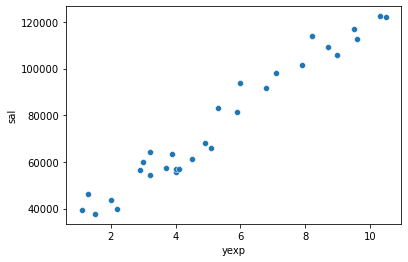

In [13]:
sns.scatterplot(x='yexp',y='sal',data=data) #scatter plot


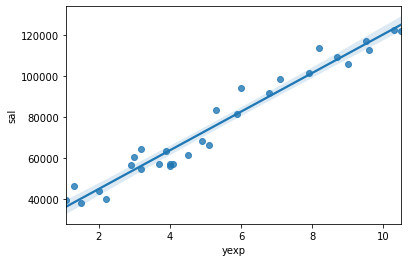

In [14]:
sns.regplot(y='sal', x='yexp', data=data)
plt.show()

In [15]:
data.corr() ##|r| is greater than 0.85 it means the strong positive relation B/W YEAR OF EXPERIANCE and SALARY .

,yexp,sal
yexp,1.000000,0.978242
sal,0.978242,1.000000


<AxesSubplot:>

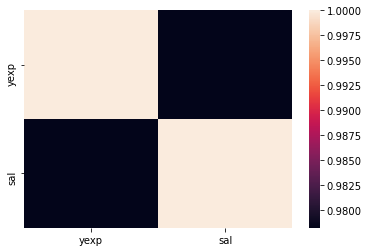

In [16]:
sns.heatmap(data.corr())

# Simple linear regression Formula based model 


In [19]:
#Coefficient m can be calculated using
def cal_coff(x,y):
    x=np.array(x)
    y=np.array(y)
    return np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum(np.square(x-np.mean(x)))
#Intercept b can be calculated using 
def cal_intercept(x,y):
    m=cal_coff(x,y)
    return np.mean(y)-(m*np.mean(x))
#Predict y data based on y=mx+c
def predict(x,y):
    x=np.array(x)
    y=np.array(y)
    cofficient= cal_coff(x,y)
    intercept=cal_intercept(x,y)
    return cofficient*x + intercept


In [168]:
Yprd=predict(data.yexp,data.sal)

In [169]:
#Predicted value
np.sqrt(np.mean(np.square(data.sal-Yprd)))

5592.043608760662

In [170]:
x=data.yexp.values
y=data.sal.values
x=x.reshape(-1,1)

# Develop the model using Sk-learn library

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [172]:
X_train,X_test,Y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [173]:
reg=LinearRegression().fit(X_train,Y_train)

In [174]:
Yhat_test=reg.predict(X_test)

In [175]:
reg.coef_ , reg.intercept_

(array([9426.03876907]), 25324.335379244316)

In [176]:
np.sqrt(np.mean(np.square(y_test-Yhat_test)))

5941.54011070656

In [177]:
Yhat=reg.predict(x)

In [178]:
np.sqrt(np.mean(np.square(data.sal-Yhat)))

5624.002757585292

In [179]:
reg.score(x,y)

0.956463263373643

In [180]:
r2_score(y,Yhat)

0.956463263373643

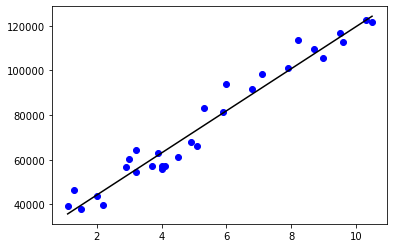

In [181]:
plt.scatter(x, y, color ='b')
plt.plot(x, Yhat, color ='k')
  
plt.show()

# Ordinary Least Square Method

# Model1
**Now we will create a simple model without using any transformation**

In [182]:
model1=smf.ols('sal~yexp',data=data).fit()

In [183]:
model1.params

Intercept    25792.200199
yexp          9449.962321
dtype: float64

In [184]:
(model1.tvalues,"\n",model1.pvalues) # P-value should be less than 0.05(5.51e-12) it is significant

(Intercept    11.346940
 yexp         24.950094
 dtype: float64,
 '\n',
 Intercept    5.511950e-12
 yexp         1.143068e-20
 dtype: float64)

In [185]:
model1.summary()

# The R-Squared Value is 0.957 which is greater than 0.8
# Adjusted R-Squared Value is 0.9554 
# The P-Value for F-Statistic is 1.14e-20(Overall Probability Model is also less than 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.14e-20
Time:                        02:50:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
yexp        9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
print(model1.conf_int(0.05))
#95% confidence interval
# This code will get us 2 equations 
# 1 to caliculate the lower range and other for upper range

                      0             1
Intercept  21136.061314  30448.339084
yexp        8674.118747  10225.805896


In [187]:
df_yexp=data.iloc[:,:1]

In [188]:
model1.predict(df_yexp) ##Predicted salary for model1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

 # ( Model2)

# We may have to do transformation of variables for better R-squared value
# Applying transformations

# Logarthmic transformation
# Regression using logarthmic transformation

In [189]:
model2=smf.ols('sal~np.log(yexp)',data=data).fit()

In [190]:
model2.params

Intercept       14927.97177
np.log(yexp)    40581.98796
dtype: float64

In [191]:
(model2.tvalues,"\n",model2.pvalues) # P-value should be less than 0.05(5.51e-12) it is significant

(Intercept        2.895135
 np.log(yexp)    12.791989
 dtype: float64,
 '\n',
 Intercept       7.268813e-03
 np.log(yexp)    3.250155e-13
 dtype: float64)

In [192]:
model2.summary()
# The R-Squared Value is 0.854 which is greater than 0.8 
# Adjusted R-Squared Value is 0.849
# The P-Value for F-Statistic is 3.25e-13(Overall Probability Model is also less than 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.25e-13
Time:                        02:50:05   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(yexp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
model2.predict(df_yexp)#model2 predict salary

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

# Model3
# R-squared value for the model2 is 0.854
# Adjusted R-squared:  0.849 

# we may have to do different transformation for a better R-squared value
# Applying different transformations

# Exponential model

In [194]:
model3=smf.ols('np.log(sal)~yexp',data=data).fit()

In [195]:
model3.params

Intercept    10.507402
yexp          0.125453
dtype: float64

In [196]:
(model3.tvalues,"\n",model3.pvalues) # P-value should be less than 0.05( 1.604634e-49) it is significant

(Intercept    273.327166
 yexp          19.584833
 dtype: float64,
 '\n',
 Intercept    1.604634e-49
 yexp         7.027439e-18
 dtype: float64)

In [197]:
model3.summary()
# R-squared value - 0.932
# Adjusted R SQuare Value - 0.930

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 14 May 2021   Prob (F-statistic):           7.03e-18
Time:                        02:50:07   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
yexp           0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
np.exp(model3.predict(df_yexp))#model3 predict salary

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

# Model4
# R-squared value for the model3 is 0.932
# Adjusted R-squared:  0.930

# Higher the R-sqaured value - Better chances of getting good model for Salary hike and Years of Experience

# Qurdratic model

In [199]:
model4=smf.ols('sal~yexp+np.square(yexp)',data=data).fit()

In [200]:
model4.params

Intercept          26214.932677
yexp                9259.283888
np.square(yexp)       16.392566
dtype: float64

In [201]:
(model4.tvalues,"\n",model4.pvalues) # P-value should be less than 0.05( 0.000004) it is significant

(Intercept          5.755611
 yexp               5.112783
 np.square(yexp)    0.107760
 dtype: float64,
 '\n',
 Intercept          0.000004
 yexp               0.000022
 np.square(yexp)    0.914983
 dtype: float64)

In [202]:
model4.summary()
# The R-Squared Value is 0.957 which is greater than 0.8
# Adjusted R-Squared Value is 0.954 
# The P-Value for F-Statistic is 3.59e-19(Overall Probability Model is also less than 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.59e-19
Time:                        02:50:11   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
yexp             9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
np.square(yexp)    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
model4.predict(df_yexp)#model4 predict salary

0      36419.979959
1      38279.705169
2      40140.741784
3      44799.070719
4      46664.697252
5      53204.717436
6      54140.317439
7      56012.500998
8      56012.500998
9      60698.697296
10     62575.470775
11     63514.349291
12     63514.349291
13     64453.555659
14     68213.659642
15     71979.009247
16     73863.651157
17     75749.604472
18     81415.332851
19     82360.768394
20     89936.055383
21     92782.197551
22    100386.335458
23    103243.296720
24    108011.455849
25    110876.285543
26    115657.558725
27    116614.796916
28    123324.644086
29    125244.693940
dtype: float64

# Model5
# R-squared value for the model4 is 0.957
# Adjusted R-squared:  0.954

# Higher the R-sqaured value - Better chances of getting good model for Salary hike and Years of Experience

# Cubic model

In [204]:
model5=smf.ols('sal~yexp+np.square(yexp)*yexp',data=data).fit()

In [205]:
model5.params

Intercept               38863.071850
yexp                     -718.708414
np.square(yexp)          2099.351946
np.square(yexp):yexp     -122.915414
dtype: float64

In [206]:
(model5.tvalues,"\n",model5.pvalues) # P-value should be less than 0.05(0.000012) it is significant

(Intercept               5.386616
 yexp                   -0.146912
 np.square(yexp)         2.167956
 np.square(yexp):yexp   -2.174735
 dtype: float64,
 '\n',
 Intercept               0.000012
 yexp                    0.884335
 np.square(yexp)         0.039500
 np.square(yexp):yexp    0.038935
 dtype: float64)

In [207]:
model5.summary()
# The R-Squared Value is 0.964 which is greater than 0.8
# Adjusted R-Squared Value is 0.959
# The P-Value for F-Statistic is 8.11e-19(Overall Probability Model is also less than 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     229.4
Date:                Fri, 14 May 2021   Prob (F-statistic):           8.11e-19
Time:                        02:50:13   Log-Likelihood:                -298.93
No. Observations:                  30   AIC:                             605.9
Df Residuals:                      26   BIC:                             611.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.886e+04   7214.747      5.387      0.000     2.4e+04    5.37e+04
yexp                  -718.7084   4892.111     -0.147      0.884   -1.08e+04    9337.171
np.square(yexp)       2099.3519    968.355      2.168      0.040     108.869    4089.835
np.square(yexp):yexp  -122.9154     56.520     -2.175      0.039    -239.093      -6.737
==============================================================================
Omnibus:                        2.261   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.849
Skew:                           0.470   Prob(JB):                        0.397
Kurtosis:                       2.228   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
pred=model5.predict(df_yexp)#model5 predict salary

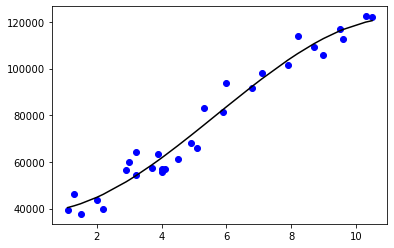

In [211]:
plt.scatter(data.yexp, data.sal, color ='b')
plt.plot(data.yexp, pred, color ='k')
  
plt.show()

In [209]:
np.sqrt(np.mean((data.sal-pred)**2)) ##Error also less in this model

5142.642278716049

# Conclusion:-Model5(Cubic transformation)  is best model because
# R-squared value - 0.964 is higher than other model
# Adjusted R SQuare Value - 0.959 also higher than other model
# Higher the R-sqaured value - Better chances of getting good model for Delivery Time and Sorting Time